In [1]:
from src.solving_eos import EOS

In [2]:
molecule = EOS(molecule='CH3Cl')
print("ω = ", molecule.ω)
print("Pc = ", molecule.Pc)
print("Tc = ", molecule.Tc)
print("Or = ", molecule.Or)
print("Ov = ", molecule.Ov)
print(molecule.antoineq)

ω =  0.151
Pc =  6680000.0
Tc =  416.2
Or =  [7.32  0.637 0.637]
Ov =  [4270. 1950. 1050. 4380. 4380. 2140. 2140. 1460. 1460.]
             T1     T2       A         B         C
molecule                                          
CH3Cl     198.0  300.0  4.2251   951.561   -23.468
CH3Cl     300.0  416.3  4.9186  1427.529  1427.529


In [3]:
T1 = [200, 200]
P1 = [6000, 9000]
molecule.solve_eos(T1, P1)

array([2.76496058e-01, 4.65007355e-05])

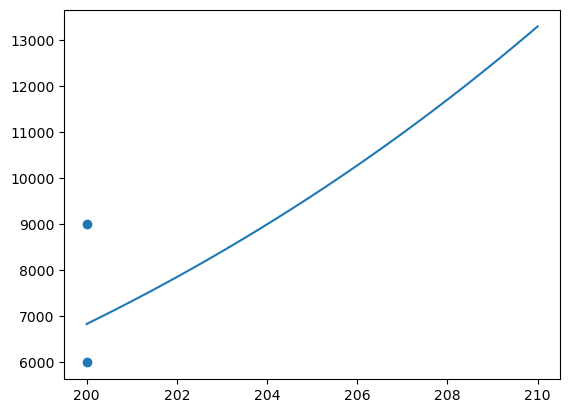

In [4]:
import numpy as np
import matplotlib.pyplot as plt
T = np.linspace(200, 210, 100)

molecule.antoine(T)
plt.plot(T, molecule.antoine(T))
plt.scatter(T1, P1)

In [5]:
molecule.solve_eos([200], [7000])

array([4.65007972e-05])

In [6]:
#Deliverables in Summary Format:
T1 = 200     #Kelvin
P1 = 6000    #Pascals

T2 = 450     #Kelvin
P2 = 209000  #Pascals

H1_Ideal = molecule.H_ig(T1, P1)
S1_Ideal = molecule.S_ig(T1, P1)
G1_Ideal = molecule.G_ig(T1,P1)

H2_Ideal = molecule.H_ig(T2, P2)
S2_Ideal = molecule.S_ig(T2, P2)
G2_Ideal = molecule.G_ig(T2,P2)

H1_Depart = molecule.ΔH_dep(T1, P1, phase='liquid')
S1_Depart = molecule.ΔS_dep(T1, P1, phase='liquid')
G1_Depart = molecule.ΔG_dep(T1, P1, phase='liquid')

#T>371.5 creates error in Antoine routine: "single positional indexer is out-of-bounds"
#T2=371.4

H2_Depart = molecule.ΔH_dep(T2, P2, phase='liquid')
S2_Depart = molecule.ΔS_dep(T2, P2, phase='liquid')
G2_Depart = molecule.ΔG_dep(T2, P2, phase='liquid')
#G2_Depart_Check = molecule.ΔG_dep(T2, P2)

print('H1_Ideal =',np.round(H1_Ideal/1000,2),'kJ/mol    ','S1_Ideal =  ', np.round(S1_Ideal,3),'J/mol/K    ','G1_Ideal =',np.round(G1_Ideal/1000,2),'kJ/mol')
print('H2_Ideal =',np.round(H2_Ideal/1000,2),'kJ/mol    ','S2_Ideal =  ', np.round(S2_Ideal,3),' J/mol/K    ','G2_Ideal =',np.round(G2_Ideal/1000,2),'kJ/mol')
print('')
print('H1_Depart =   ',np.round(H1_Depart/1000,2),'kJ/mol    ','S1_Depart =', np.round(S1_Depart,3),'J/mol/K    ','G1_Depart =  ',np.round(G1_Depart/1000,2),'kJ/mol')

#T>371.5 creates error in Antoine routine: "single positional indexer is out-of-bounds"
#T2=371.4
print('H2_Depart = ',np.round(H2_Depart/1000,2),'kJ/mol    ','S2_Depart =  ', np.round(S2_Depart,3),'J/mol/K    ','G2_Depart = ',np.round(G2_Depart/1000,2),'kJ/mol')
print('')

print('ΔH1_to_2_Ideal =  ',np.round((H2_Ideal-H1_Ideal)/1000,2),'kJ/mol    ','    ΔH1_to_2_Real = ',np.round((H2_Ideal+H2_Depart-H1_Ideal-H1_Depart)/1000,2),'kJ/mol    ',)
print('ΔS1_to_2_Ideal =  ',np.round((S2_Ideal-S1_Ideal),1),'J/mol/K    ','   ΔS1_to_2_Real = ',np.round((S2_Ideal+S2_Depart-S1_Ideal-S1_Depart),1),'J/mol/K    ',)
print('ΔG1_to_2_Ideal =',np.round((G2_Ideal-G1_Ideal)/1000,2),'kJ/mol    ','   ΔG1_to_2_Real = ',np.round((G2_Ideal+G2_Depart-G1_Ideal-G1_Depart)/1000,2),'kJ/mol    ',)


H1_Ideal = -1544.29 kJ/mol     S1_Ideal =   242.885 J/mol/K     G1_Ideal = -1592.87 kJ/mol
H2_Ideal = -1533.59 kJ/mol     S2_Ideal =   247.174  J/mol/K     G2_Ideal = -1644.82 kJ/mol

H1_Depart =    -23.13 kJ/mol     S1_Depart = -116.969 J/mol/K     G1_Depart =   0.27 kJ/mol
H2_Depart =  -0.11 kJ/mol     S2_Depart =   -0.16 J/mol/K     G2_Depart =  -0.04 kJ/mol

ΔH1_to_2_Ideal =   10.7 kJ/mol         ΔH1_to_2_Real =  33.72 kJ/mol    
ΔS1_to_2_Ideal =   4.3 J/mol/K        ΔS1_to_2_Real =  121.1 J/mol/K    
ΔG1_to_2_Ideal = -51.95 kJ/mol        ΔG1_to_2_Real =  -52.25 kJ/mol    


In [7]:
molecule.ΔH_real([T1,T2], [P1,P2], phase=['liquid', 'gas'])/1000

33.72277523108199

In [16]:
molecule.ΔG_real([T1,T2], [P1,P2], phase=['liquid', 'gas'])/1000

-52.25039692934416

In [17]:
molecule.ΔS_real([T1,T2], [P1,P2], phase=['liquid', 'gas'])

121.09841840571153